# Deep Learning Lab Assignment

## Author: Kaustubh Mahajan

This notebook explores deep learning concepts, including data preprocessing, activation functions, and ANN model training using TensorFlow and Scikit-learn.

---

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap


## Part A: Dataset Loading and Preprocessing

I have used the Breast Cancer dataset from Scikit-learn. The dataset is standardized before being used in the model.

In [ ]:
# Load Dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Part B: Logistic Function

The logistic function is a fundamental activation function in neural networks. It is defined as:

\[ f(x) = \frac{1}{1 + e^{-x}} \]

We apply this function to a feature in the dataset.

In [ ]:
# Logistic Function
def logistic(x):
    """
    Computes the logistic function applied to an input scalar/array
    Args: x (scalar/ndarray): scalar or numpy array of any size
    Returns: y (scalar/ndarray): logistic function applied to x, has the same shape as x
    """
    return 1 / (1 + np.exp(-x))

# Apply logistic function to a feature from the breast cancer dataset
feature_index = 0  # Selecting the first feature for demonstration
x_values = X_train[:, feature_index]  # Extracting feature values from training data
logistic_transformed = logistic(x_values)

# Print transformed values
print(f"Original feature values (first 10): {x_values[:10]}")
print(f"Logistic transformed values (first 10): {logistic_transformed[:10]}")



Original feature values (first 10): [-1.44075296  1.97409619 -1.39998202 -0.98179678 -1.11769991  0.11958479
  0.0827777  -0.7609542  -0.52878637  1.63433838]
Logistic transformed values (first 10): [0.19142878 0.8780504  0.19781896 0.27253541 0.24643818 0.52986062
 0.52068262 0.31843913 0.37079999 0.83676309]


In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if y > 0.5 else 0 for y in y_predicted]
        return np.array(y_predicted_cls)

# Train the logistic regression model
regressor = LogisticRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.96      1.00      0.98        73

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[38  3]
 [ 0 73]]


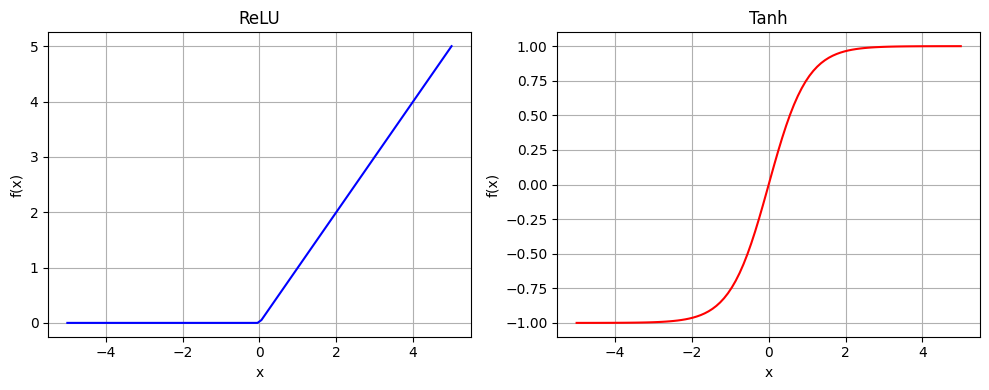

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_activation_functions(functions, titles, x_range=(-5, 5), colors=['blue', 'red']):
    fig, axes = plt.subplots(1, len(functions), figsize=(5 * len(functions), 4))
    for i, (f, title) in enumerate(zip(functions, titles)):
        x = np.linspace(*x_range, 100)
        axes[i].plot(x, f(x), color=colors[i])
        axes[i].set(title=title, xlabel="x", ylabel="f(x)")  # Shorter way to set multiple properties
        axes[i].grid()
    plt.tight_layout()
    plt.show()

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

plot_activation_functions([relu, tanh], ["ReLU", "Tanh"])  # Call with function list and title list

In [ ]:
# Log Loss Function
def log_loss_function(y_true, y_pred):
    """
    Computes log loss for a set of true values and predicted probabilities
    Args:
      y_true (array): true labels (0 or 1)
      y_pred (array): predicted probabilities (between 0 and 1)
    Returns:
      loss (float): nonnegative loss corresponding to y_true and y_pred
    """
    epsilon = 1e-15  # Avoid log(0) error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Log loss calculation
sample_predictions = y_pred[:10]
sample_true_labels = y_test[:10]

# Compute and print log loss
computed_loss = log_loss_function(sample_true_labels, sample_predictions)
print(f"Log Loss for sample data: {computed_loss}")


Log Loss for sample data: 3.4539575992340885


In [ ]:
# Part B - ANN Using Sklearn
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_sklearn = mlp.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_sklearn))

Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Part B - ANN Using Keras
ann_model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
print("ANN Accuracy (Keras):", ann_model.evaluate(X_test, y_test, verbose=0)[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy (Keras): 0.9824561476707458


Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



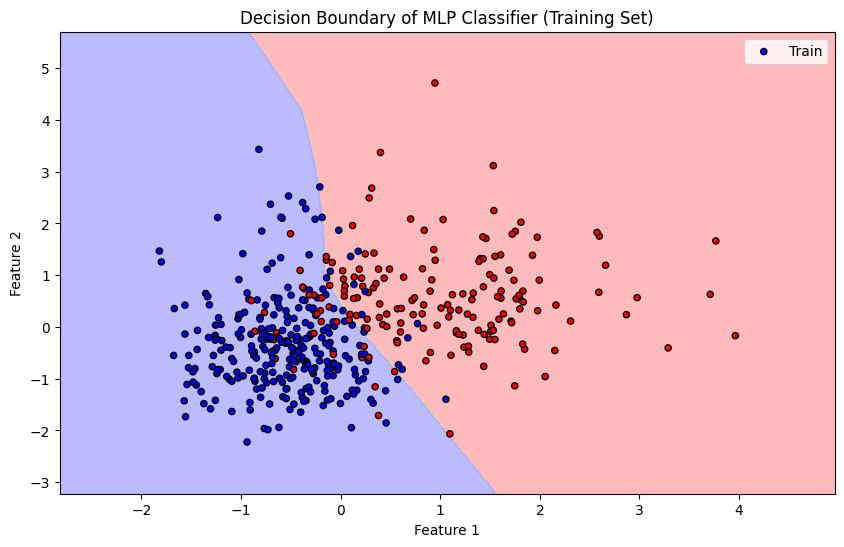

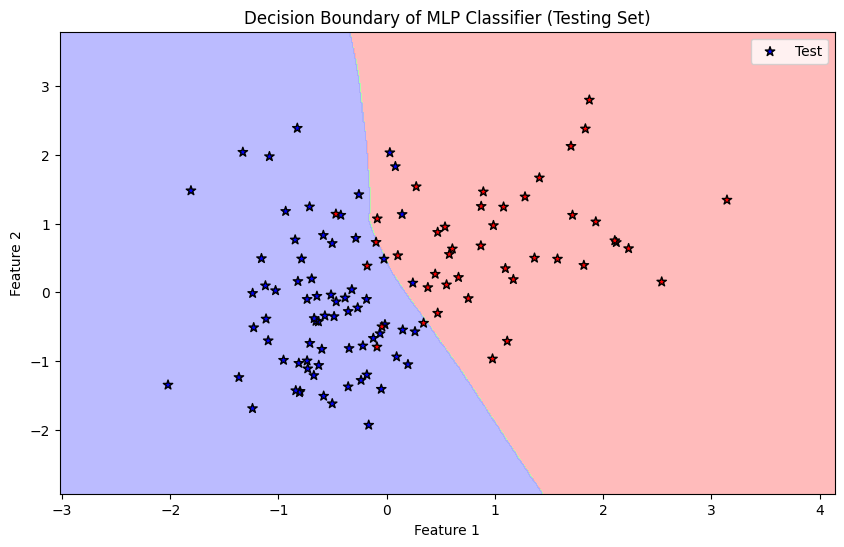

In [ ]:
X = cancer.data[:, :2]  # Use the first two features for 2D visualization
y = cancer.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Plot decision boundaries for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot decision boundaries for testing set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### Sigmoid and Derivative:
- `sigmoid(x)` computes the output of the sigmoid activation function, mapping any real-valued input into a value between 0 and 1.
- `sigmoid_derivative(x)` calculates the derivative of the sigmoid function, which is essential during backpropagation for computing gradients.

### Neural Network Class:
The `NeuralNetwork` class includes methods to initialize the network, perform forward and backward passes, and train the network.

### Forward Pass:
- Computes the activations of neurons in the network.
- The input features (from the breast cancer dataset) are passed through the layers, where weights and biases are applied.
- The activation function (sigmoid) is used to compute outputs.

### Backward Pass (Backpropagation):
- The error between the predicted output and the actual label (benign/malignant) is calculated.
- Gradients are computed using the derivative of the sigmoid function.
- Weights and biases are updated using gradient descent with a specified learning rate.

### Training Method:
- The network is trained over multiple epochs.
- Each epoch consists of a forward pass followed by a backward pass.
- The loss (mean squared error) is printed every 1000 epochs to track learning progress.

In [ ]:
# Part B - ANN from Scratch
class ANNFromScratch:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward(self, X, y, output):
        error_output = y - output
        output_layer_delta = error_output * self.sigmoid_derivative(output)
        error_hidden = output_layer_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = error_hidden * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_layer_delta) * self.learning_rate
        self.bias_output += np.sum(output_layer_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs=1000):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return self.forward(X)

ann_scratch = ANNFromScratch(input_size=X_train.shape[1], hidden_size=5, output_size=1, learning_rate=0.01)
ann_scratch.train(X_train, y_train.reshape(-1, 1), epochs=1000)
predictions = ann_scratch.predict(X_test)
predictions = [1 if i > 0.5 else 0 for i in predictions]
print("ANN Accuracy (Scratch):", accuracy_score(y_test, predictions))


ANN Accuracy (Scratch): 0.9824561403508771
